In [16]:
import pandas as pd
reddit_df = pd.read_csv("dreaddit_StressAnalysis.csv")
reddit_df = reddit_df[reddit_df["confidence"] >= 0.7]
reddit_df = reddit_df[["text", "label"]]
print(reddit_df["label"].value_counts())

label
1    244
0    202
Name: count, dtype: int64


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
vectorizer = TfidfVectorizer(max_features=100)
X_reddit = vectorizer.fit_transform(reddit_df["text"])
y_reddit = reddit_df["label"]

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_reddit, y_reddit, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72        41
           1       0.76      0.80      0.78        49

    accuracy                           0.76        90
   macro avg       0.75      0.75      0.75        90
weighted avg       0.76      0.76      0.75        90



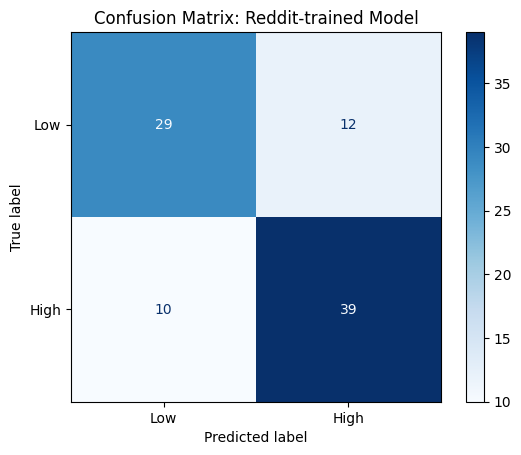

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_reddit = confusion_matrix(y_test, y_pred)
disp_reddit = ConfusionMatrixDisplay(confusion_matrix=cm_reddit, display_labels=["Low", "High"])
disp_reddit.plot(cmap="Blues")
plt.title("Confusion Matrix: Reddit-trained Model")
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
df = pd.read_csv("merged_activity.csv")

df = df[df["stress_level"].isin(["High", "Low"])].copy()

df["label"] = df["stress_level"].apply(lambda x: 1 if x == "High" else 0)

features = ["chrome_count"]  
X = df[features]
y = df["label"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
model = LogisticRegression()
model.fit(X_scaled, y)

LogisticRegression()

In [11]:
y_pred = model.predict(X_scaled)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       1.00      0.62      0.77         8

    accuracy                           0.82        17
   macro avg       0.88      0.81      0.81        17
weighted avg       0.87      0.82      0.82        17



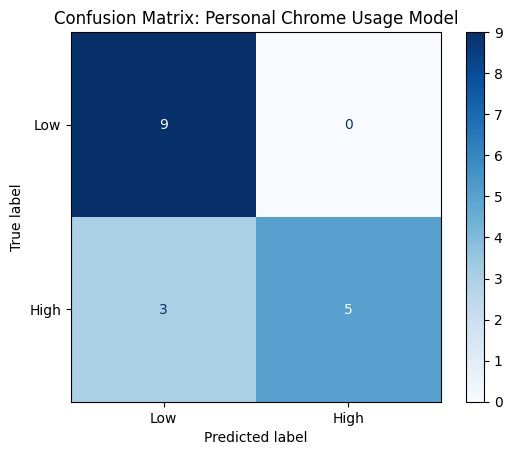

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "High"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: Personal Chrome Usage Model")
plt.show()